# Поиск закономерностей, определяющих успешность компьютерных игр

В настоящее время, в декабре 2016 г., магазин «Стримчик», который продаёт по всему миру компьютерные игры, планирует рекламную кампанию на 2017 год. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## План анализа влияния факторов на популярность компьютерных игр     

[1. Откроем файл с данными и изучим общую информацию](#a)   


[2. Подготовим данные:](#ab)   

   - Заменим названия столбцов   
   - Преобразуем данные в нужные типы   
   - Обработаем пропуски при необходимости. Опишем причины, которые могли привести к пропускам   
   - При обнаружении аббревиатуры 'tbd' в столбцах с рейтингом, разберем это значение и опишем, как его обработать   
   - Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец   
   
   
[3. Проведем исследовательский анализ данных:](#abc)   

   - Посмотрим, сколько игр выпускалось в разные годы
   - Определим актуальный период для анализа   
   - Посмотрим, как менялись продажи по платформам   
   - Выберем платформы с наибольшими суммарными продажами и построим распределение по годам   
   - Возьмем данные за соответствующий актуальный период   
   - Выберем несколько потенциально прибыльных платформ   
   - Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам, опишем результат   
   - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков    
   - Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами, сформулируем выводы   
   - Соотнесем выводы с продажами игр на других платформах   
   - Проанализируем общее распределение игр по жанрам    
   - Проанализируем игры по популярности   
   
   
[4. Составим портрет пользователя каждого региона:](#abcd)   

   - Определим для пользователя каждого региона (NA, EU, JP):   
      - Самые популярные платформы (топ-5). Опишем различия в долях продаж   
      - Самые популярные жанры (топ-5). Поясним разницу   
   - Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе   
   
   
[5. Проверим гипотезы:](#abcde)   

   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;   
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.      
   

[6. Сформулируем общий вывод](#abcdef)

### 1. Откроем файл с данными и изучим общую информацию <a name="a"></a>

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st

### Откроем файл

In [2]:
games = pd.read_csv('/datasets/games.csv')

### Изучим данные таблицы games

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Описание данных    
   * Name — название игры   
   * Platform — платформа   
   * Year_of_Release — год выпуска   
   * Genre — жанр игры   
   * NA_sales — продажи в Северной Америке (миллионы долларов)   
   * EU_sales — продажи в Европе (миллионы долларов)   
   * JP_sales — продажи в Японии (миллионы долларов)   
   * Other_sales — продажи в других странах (миллионы долларов)   
   * Critic_Score — оценка критиков (максимум 100)   
   * User_Score — оценка пользователей (максимум 10)   
   * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Виды рейтингов ESRB:    
* M (Mature) — игры для детей старше 17 лет
* E (Everyone) — игры для всех
* T (Teen) — игры для подростков 13—19 лет
* E10+ (Everyone 10 and older) — игры для всех, кто старше 10 лет 
* EC (Early childhood) — игры для детей младшего возраста
* RP (Rating Pending) — рейтинг ожидается

Получим общую информацию о данных таблицы

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Названия столбцов написаны верхним и нижним регистром. Необходимо привести их к единому нижнему регистру

In [5]:
games['Name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

Столбец Name содержит два пропуска, 11559 уникальных названий игр. Тип данных object соответствует требуемому

In [6]:
games['Platform'].describe()

count     16715
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object

Столбец Platform не содержит пропусков, содержит перечень 31 платформы. Тип данных object соответствует требуемому

In [7]:
games['Year_of_Release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Столбец Year_of_Release содержит информацию о годах выпуска игр: с 1980 по 2016. Столбец содержит пропуски. Тип данных float не соответствует требуемому integer

In [8]:
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Столбец Genre содержит два пропуска. Тип данных object соответствует требуемому

In [9]:
games['NA_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64

In [10]:
games.query('NA_sales == 0')['NA_sales'].count()

4508

Столбец NA_sales не содержит пропусков. В нем 27% (4508) нулевых значений, то есть нулевых доходов от продаж игр в Северной Америке. Тип данных float соответствует требуемому

In [11]:
games['EU_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64

In [12]:
games.query('EU_sales == 0')['EU_sales'].count()

5870

Столбец EU_sales не содержит пропусков. В нем 35% (5870) нулевых значений, то есть нулевых доходов от продаж игр в Европе. Тип данных float соответствует требуемому

In [13]:
games['JP_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64

In [14]:
games.query('JP_sales == 0')['JP_sales'].count()

10514

Столбец JP_sales не содержит пропусков. В нем 63% (10514) нулевых значений, то есть нулевых доходов от продаж игр в Японии. Тип данных float соответствует требуемому

In [15]:
games['Other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64

In [16]:
games.query('Other_sales == 0')['Other_sales'].count()

6601

Столбец Other_sales не содержит пропусков. В нем 40% (6601) нулевых значений, то есть нулевых доходов от продаж игр в других странах. Тип данных float соответствует требуемому

In [17]:
games['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [18]:
games['Critic_Score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [19]:
games['Critic_Score'].isna().sum()

8578

Столбец Critic_Score содержит более 50% пропусков. Оценка критиков принимает целочисленные значения от 13 до 98. Тип данных float следует заменить на более соответствующий требуемому integer

In [20]:
games['User_Score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: User_Score, dtype: object

In [21]:
games['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [22]:
games['User_Score'].isna().sum() 

6701

Столбец User_Score содержит 40% пропусков. Тип данных object не соответствует требуемому float. Среди числовых показателей рейтинга 2 424 раза присутствует рейтинг 'tbd'. Необходимо выяснить, что это за показатель. Оценка пользователей принимает значения от 0 до 9.7

In [23]:
games['Rating'].describe()

count     9949
unique       8
top          E
freq      3990
Name: Rating, dtype: object

In [24]:
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

Столбец Rating содержит более 40% пропусков. Тип данных object соответствует требуемому

### Вывод    

В данных обнаружены следующие проблемы и несоответствия:   
   * Названия столбцов написаны разными регистрами. Необходимо привести их к единому нижнему регистру   
   * Столбцы Name и Genre содержат по два пропуска   
   * Столбец Year_of_Release содержит пропуски. Тип данных float не соответствует требуемому integer   
   * Столбцы NA_sales, EU_sales, JP_sales и Other_sales содержат много нулевых значений: от 27% до 63%   
   * Столбец Critic_Score содержит более 50% пропусков. Тип данных float не соответствует требуемому integer      
   * Столбец User_Score содержит 40% пропусков. Тип данных object не соответствует требуемому float. Среди числовых показателей рейтинга 2 424 раза присутствует рейтинг 'tbd'. Необходимо выяснить, что это за показатель   
   * Столбец Rating содержит более 40% пропусков

### 2. Подготовим данные к анализу <a name="ab"></a>

In [25]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Привели названия столбцов к единому регистру

In [26]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в столбцах name и genre совпадают. Две записи в таблице games не содержат информации ни о названии игры, ни о ее жанре. Так же отсутствуют показатели оценки критиков и пользователей. Так как заполнить пропуски в столбцах name и genre нечем, и две записи в таблице из 16715 записей - это очень маленький объем данных, можно спокойно избавиться от этих двух строчек 

In [27]:
games = games[games['name'].notna()].reset_index(drop=True)

Избавимся от пропусков в столбце year_of_release. Всего у нас 269 пропусков

In [28]:
games['year_of_release'].isna().sum()

269

Заменим пропуски в дате выпуска игры на известную нам дату выпуска этой игры (из других записей в таблице)

In [29]:
games.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1880,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3888,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5707,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [30]:
def fill_year(column, value):
    year = games[(games[column] == value) & (games['year_of_release'].notna())]['year_of_release'].median()
    games.loc[(games[column] == value) & (games['year_of_release'].isna()), 'year_of_release'] = year
    
for name in games.query('year_of_release.isna()')['name'].unique():
    fill_year('name', name)    

In [31]:
games['year_of_release'].isna().sum()

146

Заменим оставшиеся 146 пропусков уже менее точным способом - медианой даты выпуска игр по каждой игровой платформе (платформе, на которой выпущена игра с пропущенным годом выпуска)

In [32]:
for platform in games.query('year_of_release.isna()')['platform'].unique():
    fill_year('platform', platform) 

Приведем тип данных к требуемому и проверим на наличие пропусков

In [33]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'].isna().sum()

0

Проанализируем нулевые значения в столбцах по продажам игр: na_sales, eu_sales, jp_sales и other_sales

In [34]:
games.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16674,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16707,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


У нас в таблице с данными всего по одной записи о двух играх, доход от продаж по которым в Северной Америке, Европе, Японии и других странах является нулевым.   
Значит, по остальным играм присутствует информация о положительном доходе хоть по одному из вышеперечисленных регионов.    
Данные в таблице указаны в миллионах долларов, т.е. значение 0.1 означает 100 000 долларов США. Доходы от продаж менее 100 000 долларов могли быть учтены в таблице как нули.    
Тогда нулевые показатели представляются реальными данными и никаких преобразований не требуют. 

Проанализируем пропуски в столбцах с оценкой игр критиками, пользователями и рейтингом ESRB: critic_score, user_score, rating

In [35]:
len(games.query('critic_score.isna() or user_score.isna() or rating.isna()')) / len(games) * 100

51.9834859091725

Более половины данных содержат пропуски в столбцах с оценкой критиками/пользователями или рейтингом. Удалять такой большой объем информации нельзя.    
Заменить пропуски в оценке/рейтинге игры на ноль или медиану/среднее значение всего столбца тоже неправильно, так как показатель оценки/рейтинга является индивидуальной характеристикой игры и игровой платформы, на которой она используется, и не зависит от показателей оценки/рейтинга других игр.   
Поэтому оставим пропуски в данных столбцах без изменений

Так как столбец critic_score остался с пропусками, мы не сможем изменить тип его данных на целочисленный.    
Однако в столбце user_score тип данных object надо изменить на float. Для этого выясним, что означает значение 'tbd' в этом столбце

Аббревиатура **'tbd'** означает **'to be determined'** и переводится как **'будет определено'**. То есть на момент заполнения данных оценка игры пользователями отсутствовала, и значение 'tbd' приравнивается к пропуску в оценке. Переведем значение 'tbd' в 'nan' и исправим тип данных

In [36]:
games['user_score'] = games['user_score'].replace('tbd', np.nan).astype('float')

Посчитаем для каждой игры на отдельной платформе суммарные продажи во всех регионах и запишем их в отдельный столбец

In [37]:
games['sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод   
В результате предварительной обработки данных названия столбцов приведены к единому регистру.   
От пропусков в столбцах name и genre избавились, удалив две записи в таблице.      
Избавились от пропусков в столбце year_of_release. Вначале заменили пропуски в дате выпуска игры на известную нам дату выпуска этой игры по другим записям. Оставшиеся пропуски заменили медианой даты выпуска игр на соответствующей платформе.   
Столбец year_of_release приведен к целочисленному типу данных.      
Проанализировали нулевые значения в столбцах по продажам игр в разных регионах: na_sales, eu_sales, jp_sales и other_sales.   
Так как данные в таблице указаны в миллионах долларов, то значение менее 0.1 означает доход менее 100 000 долларов. Это большие суммы, но в таблице они могли быть учтены как нули. Поэтому нулевые показатели представляются реальными данными и никаких преобразований не требуют.    
Проанализировали пропуски в столбцах с оценкой игр критиками, пользователями и рейтингом ESRB: critic_score, user_score, rating.   
52% данных содержат пропуски в столбцах с оценкой критиками/пользователями или рейтингом. Поэтому удалять такой большой объем информации нельзя.   
Заменить пропуски в оценке/рейтинге игры на ноль или медиану/среднее значение всего столбца тоже неправильно, так как показатель оценки/рейтинга является индивидуальной характеристикой игры и игровой платформы, на которой она используется, и не зависит от показателей оценки/рейтинга других игр. Поэтому пропуски в данных столбцах оставлены без изменений.   
Аббревиатура **'tbd'** в столбце user_score означает **'to be determined'** и переводится как **'будет определено'**. То есть на момент заполнения данных оценка игры пользователями отсутствовала, и значение 'tbd' приравнивается к пропуску в оценке. Значение 'tbd' было переведено в 'nan'.   
Столбцам critic_score и user_score был присвоен вещественный тип данных.   
Для каждой игры на отдельной платформе были посчитаны суммарные продажи во всех регионах.

### 3. Исследовательский анализ данных <a name="abc"></a>

Посмотрим, сколько игр выпускалось в разные годы

In [38]:
pd.set_option('display.max_columns', 40)
games.pivot_table(columns='year_of_release', values='name', aggfunc='count')

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
name,9,46,52,17,14,14,21,16,15,17,16,41,43,60,121,219,263,290,386,341,351,486,844,797,793,948,1019,1202,1463,1455,1285,1164,662,553,582,606,502


Text(0.5, 0, 'Год выпуска игр')

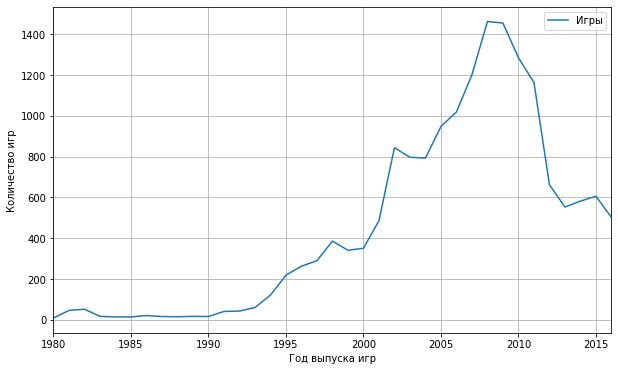

In [39]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(figsize=(10,6), grid=True)
plt.legend(['Игры'])
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска игр')

Видно, что до 1994 года ежегодно производилось не более 100 игр.   
В 1994 году прирост производства компьютерных игр составил 100%: с 60 до 121 игры.    
Начиная с 1994 года наблюдается постоянный рост количества выпускаемых игр.    
В 2002 году происходит очередной скачок производства игр на 75%: с 486 до 844 игр.   
Пик производства приходится на 2008, 2009 годы: 1463 и 1455 игр соответственно, когда возможно стартовали популярные франшизы.      
После этого начался обратный процесс: количество выпускаемых компьютерных игр ежегодно уменьшалось. В 2012 г. падение составило 45%, и в 2016 году было произведено уже 502 игры. Это связано с началом переключения пользователей на мобильные приложения игр, устанавливаемые на смартфоны.     
Можно предположить, что данные об играх, произведенных до 2002 года нам не очень важны, так как после этой даты и до 2008 года объем выпускаемых игр в несколько раз больше предыдущих. К тому же сейчас конец 2016 года, то есть прошло 15 лет, а это достаточно большой срок для актуальности игры.   

Посмотрим, как менялись продажи по платформам. Найдем платформы с суммарными продажами более 500 млн.долларов

In [40]:
games.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False).head(15)

,sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [41]:
top_sales = games.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False).head(6)
top_sales

,sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


Построим графики распределения доходности топовых платформ по годам

In [42]:
top_sales.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

Text(0.5, 0, 'Год')

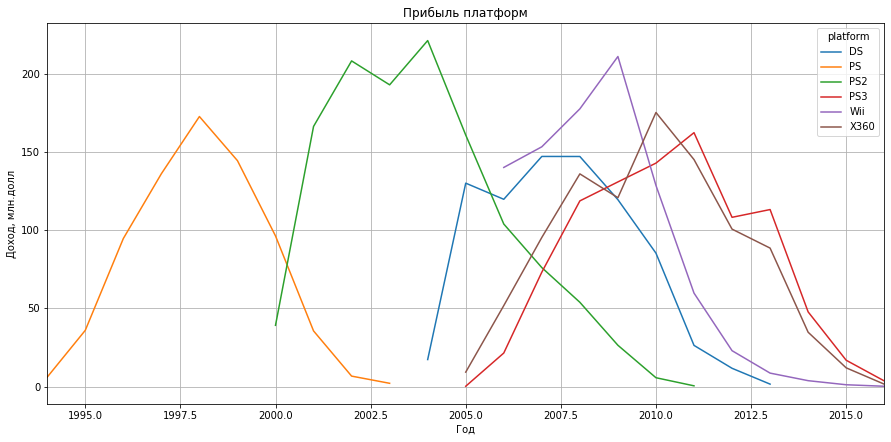

In [43]:
(games.query('platform.isin(@top_sales.index)')
 .pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
 .plot(by='platform', figsize = (15,7), grid=True))
plt.title('Прибыль платформ')
plt.xlim(1994, 2016)
plt.ylabel('Доход, млн.долл')
plt.xlabel('Год')

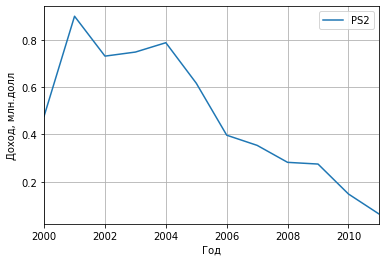

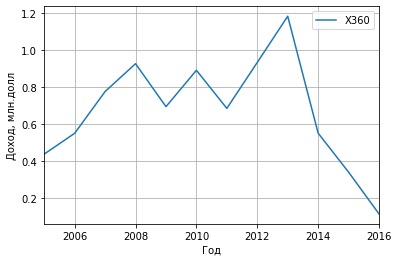

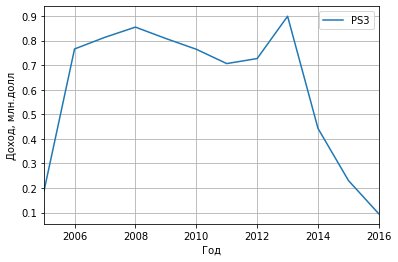

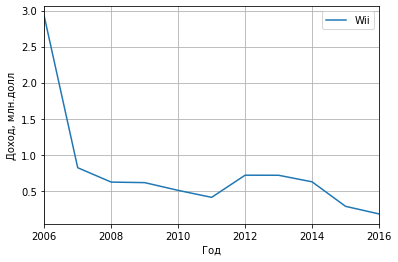

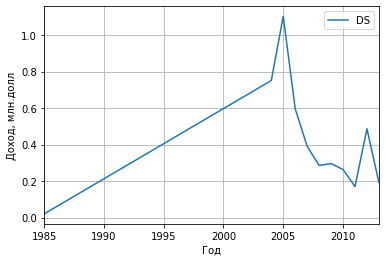

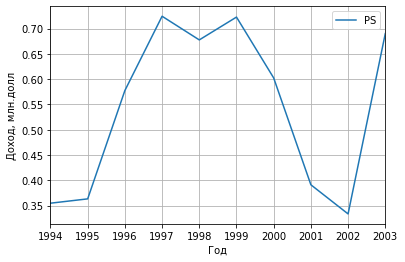

In [44]:
def paint_plot(data, platforma):
    data[data['platform'] == platforma].pivot_table(index='year_of_release', values='sales').plot(grid=True)
    plt.legend([platforma])
    plt.ylabel('Доход, млн.долл')
    plt.xlabel('Год')
for platforma in top_sales.index:
    paint_plot(games, platforma)

Обнаружилось трое самых прибыльных производителей игровых приставок:   
* Сони. Игровые платформы PS,PS2, PS3, PS4, PSP  
* Майкрософт. Игровые платформы Х360, ХВ, XOne   
* Нинтендо. Игровые платформы Wii, DS, 3DS, GBA, GB   

Производители выпускают на рынок очередную игровую платформу каждые 5-6 лет.   
Срок жизни платформы длится в основном 8-10 лет.    
Следовательно, для 2017 года будут актуальными игры, выпущенные не ранее 2007 года.    
Однако для рекламной кампании нужен запас времени, чтобы средства, инвестированные в игру, приносили прибыль в ближайшие 2-3 года. Поэтому выберем для анализа более молодые платформы на 2-3 года, то есть с 2010 года. 

Проанализируем данные за интересующий нас актуальный период с 2010 года

In [45]:
game = games.query('year_of_release > 2009')
game.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
314,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87
15164,QUIZ PARTY,Wii,2012,Misc,0.00,0.02,0.00,0.00,NaN,NaN,NaN,0.02
3985,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.00,0.03,NaN,7.3,E,0.50
10840,MindJack,X360,2011,Shooter,0.07,0.02,0.00,0.01,43.0,1.2,M,0.10
6442,Angry Birds Star Wars,Wii,2013,Strategy,0.15,0.09,0.00,0.02,NaN,2.8,E,0.26


Посмотрим, какие платформы лидируют по продажам. Найдем платформы с суммарными продажами более 150 млн.долларов 

In [46]:
game.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False)

,sales
platform,
PS3,595.11
X360,558.11
PS4,314.14
3DS,258.98
Wii,225.06
XOne,159.32
PC,125.48
DS,124.89
WiiU,82.19


In [47]:
top = game.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False).head(6)
top

,sales
platform,
PS3,595.11
X360,558.11
PS4,314.14
3DS,258.98
Wii,225.06
XOne,159.32


Построим графики распределения доходности топовых платформ по годам

In [48]:
top.index

Index(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'XOne'], dtype='object', name='platform')

Text(0, 0.5, 'Доход, млн.долл')

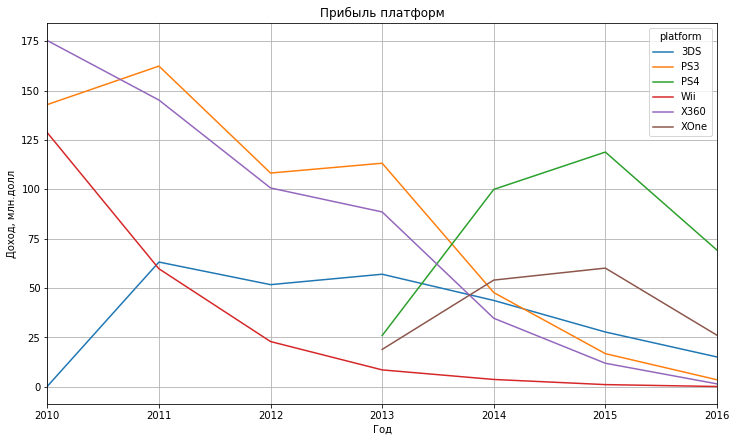

In [49]:
fig, ax = plt.subplots(figsize = (12,7))
(pd.pivot_table(game.query('platform.isin(@top.index)'), index='year_of_release', columns='platform', values='sales', aggfunc='sum')
 .plot(ax = ax, grid=True))
ax.set_title('Прибыль платформ')
ax.set_xlabel('Год')
ax.set_ylabel('Доход, млн.долл')

Text(0.5, 0, 'Год')

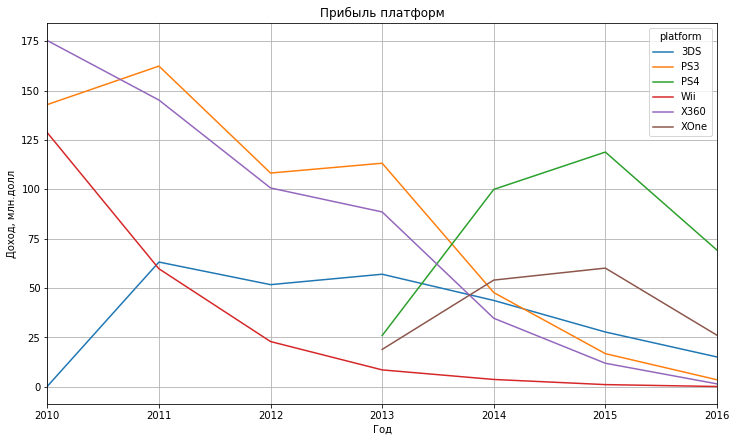

In [50]:
fig, ax = plt.subplots(figsize = (12,7))
(game.query('platform.isin(@top.index)')
 .pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
 .plot(ax = ax, grid=True))
plt.title('Прибыль платформ')
plt.ylabel('Доход, млн.долл')
plt.xlabel('Год')

Text(0.5, 0, 'Год')

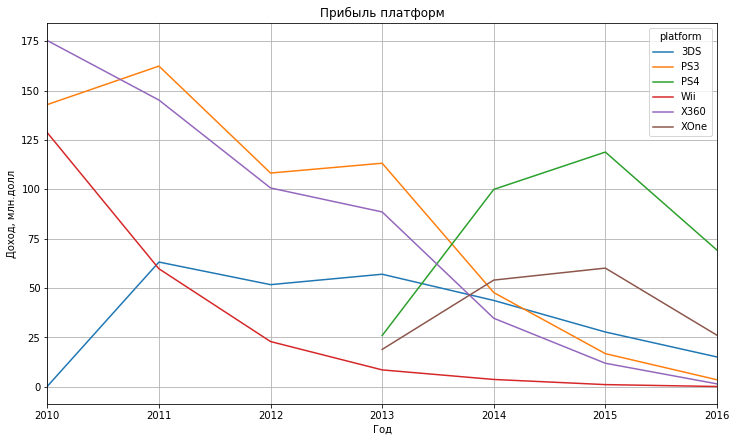

In [51]:
(game.query('platform.isin(@top.index)')
 .pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
 .plot(by='platform', figsize = (12,7), grid=True))
plt.title('Прибыль платформ')
plt.ylabel('Доход, млн.долл')
plt.xlabel('Год')

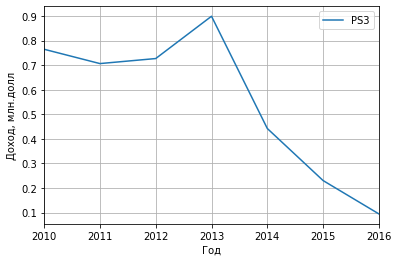

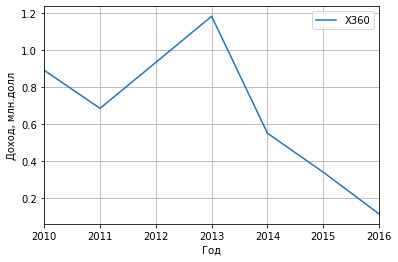

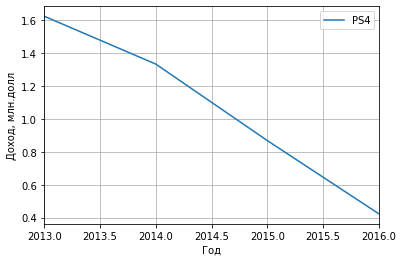

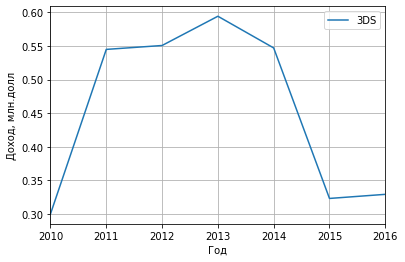

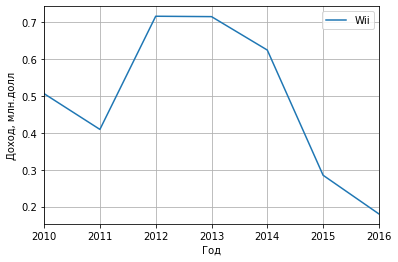

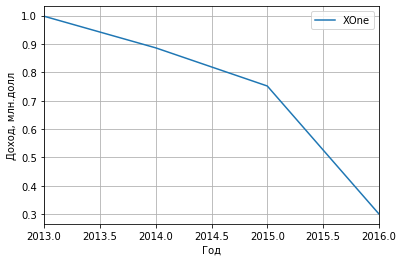

In [52]:
for platforma in top.index:
    paint_plot(game, platforma)

Общая тенденция - падение доходности от выпускаемых игр на всех платформах, начиная с 2013 года.   
Однако на конец 2016 года можно выбрать несколько потенциально прибыльных платформ. Это игровые платформы, суммы продаж по которым составили не менее 300 000 долларов:     
* PS4 (доход 0.42 млн долларов за 2016 год), производитель Сони       
* 3DS (доход 0.33 млн долларов за 2016 год), производитель Нинтендо. Наблюдается краткосрочный рост доходности с 2015 года      
* XOne (доход 0.30 млн долларов за 2016 год), производитель Майкрософт   

Построим график нормального распределения по глобальным продажам игр с разбивкой по трем потенциально прибыльным платформам

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Платформа')

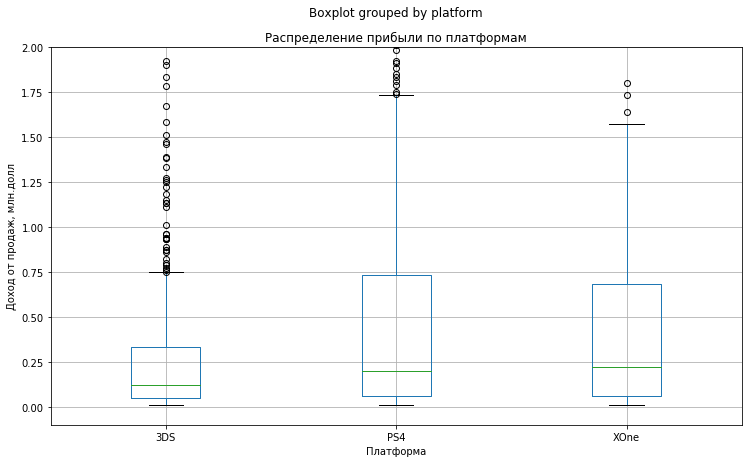

In [53]:
(game.query('platform == "PS4" or platform == "3DS" or platform == "XOne"')
 .boxplot(column='sales', by='platform', figsize=(12,7)))
plt.title('Распределение прибыли по платформам')
plt.ylim(-0.1, 2)
plt.ylabel('Доход от продаж, млн.долл')
plt.xlabel('Платформа')

In [54]:
game.query('platform == "3DS" or platform == "PS4" or platform == "XOne"').groupby('platform')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,519.0,0.498998,1.432102,0.01,0.05,0.12,0.330,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


Из графиков нормального распределения становится очевидно, что платформа производства Сони - PS4 является самой доходной и перспективной в плане рекламных инвестиций в игры на ее основе.   
У PS4 самое большое нормальное распределение по доходам от продаж игр - до 1.75 млн.долл. Половина получаемых ежегодно доходов тоже составляет самую большую величину: от 0.06 до 0.73 млн.долл. Средний годовой доход равен 0.8 млн.долл, медиана продаж - 0.2 млн.долл.  
Чуть менее доходной платформой является платформа Майкрософта - XOne. Нормальное распределение ежегодных доходов от продаж не намного уступает PS4: до 1.57 млн.долл. 50% получаемых доходов от игр на XOne варьируются в диапазоне от 0.06 до 0.685 млн.долл. Средний доход за год равен 0.645 млн.долл, медиана продаж - 0.22 млн.долл.   
У платформы Нинтендо 3DS самые низкие продажи среди самых доходных платформ. Нормальное распределение по доходам от ежегодных продаж не превышает 0.75 млн.долл. Половина получаемых доходов ограничена значениями 0.05 и 0.33 млн.долл в год. Средний доход от продажи игры на платформе 3DS составляет 0.5 млн.долл в год, медиана продаж - 0.12 млн.долл.

Посмотрим, как влияют на продажи внутри одной из популярных платформ Сони PS4 отзывы критиков 

Text(0.5, 0, 'Рейтинг критиков')

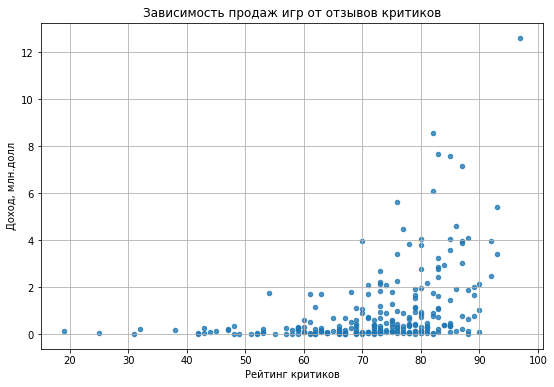

In [55]:
(game.query('platform == "PS4"')
 .plot(x='critic_score', y='sales', kind='scatter', alpha=0.8, 
       title='Зависимость продаж игр от отзывов критиков', figsize=(9,6), grid=True))
plt.ylabel('Доход, млн.долл')
plt.xlabel('Рейтинг критиков')

In [56]:
game.query('platform == "PS4"')['sales'].corr(game['critic_score'])

0.406567902061781

По диаграмме рассеяния видно, что чем выше оценка игры критиками, тем выше ее продажи. Низкой оценке игры сответствуют невысокие и редкие доходы от ее продаж. С ростом ее оценки критиками увеличивается и доход, и количество продаж игры.   
Коэффициент корреляции Пирсона положительный и равен 0.41. Это говорит о наличии прямой зависимости, хоть и не очень сильной, объемов продаж игр на платформе PS4 от их оценки критиками.   
Можно сделать вывод, что при выборе игры потребители ориентируются на профессиональное мнение критиков

Посмотрим, как влияют на продажи внутри одной из популярных платформ Сони PS4 отзывы пользователей

Text(0.5, 0, 'Рейтинг пользователей')

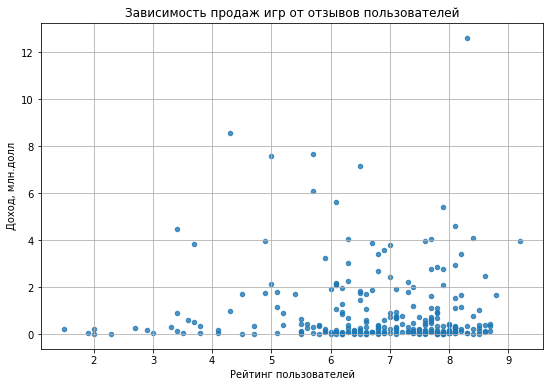

In [57]:
(game.query('platform == "PS4"')
 .plot(x='user_score', y='sales', kind='scatter', alpha=0.8, 
       title='Зависимость продаж игр от отзывов пользователей', figsize=(9,6), grid=True))
plt.ylabel('Доход, млн.долл')
plt.xlabel('Рейтинг пользователей')

In [58]:
game.query('platform == "PS4"')['sales'].corr(game['user_score'])

-0.031957110204556424

По диаграмме рассеяния видно, что рост оценки игры пользователями не влияет на ее продажи. Высокие доходы от продаж игры встречаются как при высокой ее оценке пользователями, так и при низкой. Можно даже наблюдать обратную зависимость: у игр с меньшей оценкой продажи выше, чем у игр с более высокой оценкой.     
Коэффициент корреляции Пирсона отрицательный и почти равен нулю (-0.03). Это говорит об отсутствии линейной зависимости объемов продаж игр на платформе PS4 от их оценки пользователями.    
Можно сделать вывод, что при выборе игры потребители не учитывают мнение других, таких же пользователей, а ориентируются на свои предпочтения

Проверим наши выводы на продажах игр на других платформах. Посмотрим, зависят ли продажи игр на платформах 3DS и XOne от отзывов критиков

Text(0.5, 0, 'Рейтинг критиков')

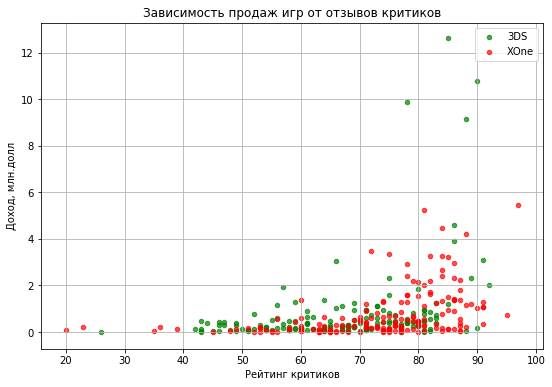

In [59]:
ax = game.query('platform == "3DS"').plot(x='critic_score', y='sales', kind='scatter', c='green', alpha=0.7)
(game.query('platform == "XOne"')
 .plot(x='critic_score', y='sales', kind='scatter', c='red', ax=ax, alpha=0.7, 
       title='Зависимость продаж игр от отзывов критиков', figsize=(9,6), grid=True))
plt.legend(['3DS','XOne'])
plt.ylabel('Доход, млн.долл')
plt.xlabel('Рейтинг критиков')

In [60]:
game.query('platform == "3DS"')['sales'].corr(game['critic_score'])

0.3494009303924131

In [61]:
game.query('platform == "XOne"')['sales'].corr(game['critic_score'])

0.41699832800840175

Как видно по диаграммам рассеяния, зависимость объемов продаж игр от оценки критиков сохраняется. С ростом оценки игры критиками увеличивается и доход, и количество продаж игры.   
Коэффициенты корреляции Пирсона положительные и почти равны коэффициенту по платформе PS4, около 0.4. Это подтверждает прямую зависимость, хоть и не очень сильную, объемов продаж игр на платформах 3DS и XOne от их оценки критиками.   
Наш вывод подтвердился, что при выборе игры потребители ориентируются на профессиональное мнение критиков

Посмотрим, зависят ли продажи игр на платформах 3DS и XOne от отзывов пользователей

Text(0.5, 0, 'Рейтинг пользователей')

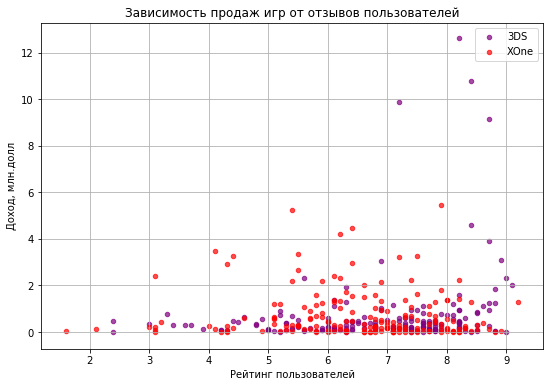

In [62]:
ax = game.query('platform == "3DS"').plot(x='user_score', y='sales', kind='scatter', c='purple', alpha=0.7)
(game.query('platform == "XOne"')
 .plot(x='user_score', y='sales', kind='scatter', c='red', ax=ax, alpha=0.7, 
       title='Зависимость продаж игр от отзывов пользователей', figsize=(9,6), grid=True))
plt.legend(['3DS','XOne'])
plt.ylabel('Доход, млн.долл')
plt.xlabel('Рейтинг пользователей')

In [63]:
game.query('platform == "3DS"')['sales'].corr(game['user_score'])

0.22480798039571082

In [64]:
game.query('platform == "XOne"')['sales'].corr(game['user_score'])

-0.06892505328279412

Как видно по диаграммам рассеяния, оценка игры пользователями не влияет на ее продажи. По платформе XOne также, как и у PS4, наблюдается обратная зависимость: у игр с меньшей оценкой продажи выше, чем у игр с более высокой оценкой. У платформы 3DS есть единичные высокие показатели продаж при высоких рейтингах покупателей.   
Наши наблюдения подтверждаются коэффициентами корреляции Пирсона: у XOne он отрицательный и почти равен нулю (-0.07), у 3DS он положительный, но небольшой: 0.22. Это свидетельствует об отсутствии линейной зависимости объемов продаж игр на платформах XOne и  3DS от их оценки пользователями.   
Наш вывод опять подтвердился, что при выборе игры потребители не учитывают мнение других, таких же пользователей, а ориентируются на свои предпочтения

Проанализируем распределение игр по жанрам

In [65]:
game.pivot_table(index='genre', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False)

,sales
genre,
Action,683.43
Shooter,482.47
Sports,330.00
Role-Playing,316.05
Misc,239.22
Racing,124.32
Platform,119.72
Fighting,81.59
Simulation,72.44


Text(0.5, 0, 'Жанр')

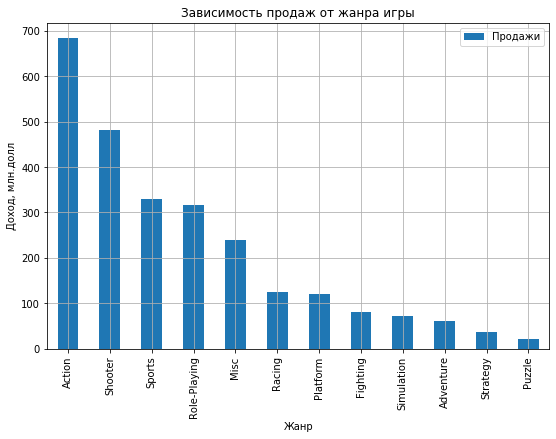

In [66]:
(game.pivot_table(index='genre', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False)
 .plot(title='Зависимость продаж от жанра игры', kind='bar', figsize=(9,6), grid=True))
plt.legend(['Продажи'])
plt.ylabel('Доход, млн.долл')
plt.xlabel('Жанр')

Из сводной таблицы и графика видно, что самые прибыльные жанры:    
* Action (683.43 млн.долл)   
* Shooter (482.47 млн.долл)   
* Sports (330.00 млн.долл)   
* Role-Playing (316.05 млн.долл)   

Жанры с наименьшими продажами:   
* Strategy (36.41 млн.долл)   
* Puzzle (21.22 млн.долл)   

Можно сказать, что самыми популярными жанрами являются жанры тех игр, производители которых продвигают франшизы. Каждый год на рынок производители выпускают по новой части, и потребители (в основном подростки) их скупают, так как это популярно/рекламируется и т.п.   
Для жанров Shooter и Sports есть устоявшиеся франшизы, такие как Call of duty для первой и FIFA для второй. Эти игры выходят каждый год, так называемый конвейер.       
Одновременно нужно учитывать, что крупные игры, наподобие FIFA или Assassin's Creed, являюся мультиплатформенными компьютерными играми, т.е. выпускаются на всех платформах. А игры жанра Strategy, вроде Warcraft Total War, которые крайне успешны для стратегий, выходят только на ПК, так как неудобно на геймпаде играть в стратегии. А на комьютере не очень удобно, соответственно, играть в гонки, игры жанра Simulation.      

Таким образом, основные критерии прибыльности игры - известность франшизы, мультиплатформенность.  

Однако не надо забывать, что большинство игр обладают несколькими жанрами одновременно. Например, игра Fallout является игрой в жанрах Shooter, Action, Role-Playing и Adventure одновременно. К тому же, часто результат разработки игр бывает непредсказуем по своей популярности и доходности. Например Мinecraft, компьютерная игра в жанре песочницы, разработанная одним шведским программистом Маркусом Перссоном, без инвестиционных вливаний и рекламной кампании стала одной из самых популярных игр. 

Проанализируем игры по популярности

Посмотрим, какие игры являются мировыми лидерами по продажам. Зависит ли популярность игры от использования производителем франшиз, то есть ежегодного конвейера по производству новых версий игры

In [67]:
top_game = game.pivot_table(index='name', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False)
top_game.head(10)

,sales
name,
Grand Theft Auto V,56.58
Call of Duty: Black Ops,30.82
Call of Duty: Modern Warfare 3,30.60
Call of Duty: Black Ops II,29.40
Call of Duty: Ghosts,27.39
Call of Duty: Black Ops 3,25.67
Minecraft,24.16
Call of Duty: Advanced Warfare,21.97
Kinect Adventures!,21.82


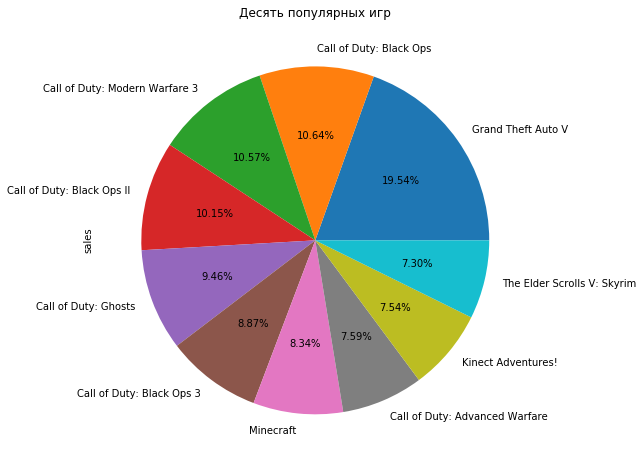

In [68]:
top_game.head(10).plot(kind='pie', y='sales', autopct='%1.2f%%', figsize=(8,8), legend=None,
                 title='Десять популярных игр')

Первое место по прибыльности занимает игра GTA. На нее приходится почти 20% мировых продаж. Игра Call of Duty занимает со второго по восьмое места и в результате именно она является лидером по продажам: 57% рынка. Популярность игры достигается за счет ежегодного выпуска производителем франшиз. Седьмое место занимает игра шведского программиста Minecraft. 

### Вывод   

Начиная с 1994 года наблюдался постоянный рост количества выпускаемых игр. Пик производства пришелся на 2008-2009 годы, когда стартовали популярные франшизы: 1463 и 1455 игр соответственно. После этого начался обратный процесс: количество выпускаемых компьютерных игр ежегодно уменьшалось. Начиная с 2012 года на рынке появились мобильные приложения игр для смартфонов, и пользователи переключились на них. В 2016 году было произведено уже лишь 502 игры.   
Трое самых прибыльных производителей игровых приставок:   
- Сони. Игровые платформы PS,PS2, PS3, PS4, PSP   
- Майкрософт. Игровые платформы Х360, ХВ, XOne   
- Нинтендо. Игровые платформы Wii, DS, 3DS, GBA, GB   

Производители выпускают на рынок очередную игровую платформу каждые 5-6 лет. Срок жизни платформы длится в основном 8-10 лет. Следовательно, для 2017 года будут актуальными игры, выпущенные не ранее 2007 года. Однако для рекламной кампании нужен запас времени, чтобы средства, инвестированные в игру, приносили прибыль в ближайшие 2-3 года. Поэтому были выбраны для анализа более молодые платформы, с 2010 года.     

Обнаружена общая тенденция - падение доходности от выпускаемых игр на всех платформах, начиная с 2013 года. Однако на конец 2016 года можно выбрать несколько потенциально прибыльных платформ. Это игровые платформы, суммы продаж по которым составили не менее 300 000 долларов:     
- PS4 (доход 0.42 млн долларов за 2016 год), производства Сони   
- 3DS (доход 0.33 млн долларов за 2016 год), производства Нинтендо   
- XOne (доход 0.30 млн долларов за 2016 год), производства Майкрософт   

Из графиков нормального распределения очевидно, что платформа производства Сони - PS4 является самой доходной и перспективной в плане рекламных инвестиций в игры на ее основе.   
У PS4 самое большое нормальное распределение по доходам от продаж игр - до 1.75 млн.долл. Половина получаемых ежегодно доходов тоже составляет самую большую величину: от 0.06 до 0.73 млн.долл. Средний годовой доход равен 0.8 млн.долл, медиана - 0.2 млн.долл.   
Чуть менее доходной платформой является платформа Майкрософта - XOne. Нормальное распределение ежегодных доходов от продаж не намного уступает PS4: до 1.57 млн.долл. 50% получаемых доходов от игр на XOne варьируются в диапазоне от 0.06 до 0.685 млн.долл. Средний доход за год равен 0.645 млн.долл, медиана - 0.22 млн.долл.   
У платформы Нинтендо 3DS самые низкие продажи среди высокодоходных платформ. Нормальное распределение по доходам от ежегодных продаж не превышает 0.75 млн.долл. Половина получаемых доходов ограничена значениями 0.05 и 0.33 млн.долл в год. Средний доход от продажи игры на платформе 3DS составляет 0.5 млн.долл в год, медиана - 0.12 млн.долл.         

Проанализировали влияние отзывов критиков на продажи внутри одной из популярных платформ Сони PS4.         
По диаграмме рассеяния установили, что чем выше оценка игры критиками, тем выше ее продажи. Низкой оценке игры сответствуют невысокие и редкие доходы от ее продаж. С ростом ее оценки критиками увеличивается и доход, и количество продаж игры.   
Коэффициент корреляции Пирсона положительный и равен 0.41. Это говорит о наличии прямой зависимости, хоть и не очень сильной, объемов продаж игр на платформе PS4 от их оценки критиками.   
Можно сделать вывод, что при выборе игры потребители ориентируются на профессиональное мнение критиков.      

Проанализировали влияние отзывов пользователей на продажи внутри платформы PS4.      
По диаграмме рассеяния установили, что рост оценки игры пользователями не влияет на ее продажи. Высокие доходы от продаж игры встречаются как при высокой ее оценке пользователями, так и при низкой. Можно даже наблюдать обратную зависимость: у игр с меньшей оценкой продажи выше, чем у игр с более высокой оценкой.   
Коэффициент корреляции Пирсона отрицательный и почти равен нулю (-0.03). Это говорит об отсутствии линейной зависимости объемов продаж игр на платформе PS4 от их оценки пользователями.   
Можно сделать вывод, что при выборе игры потребители не учитывают мнение других, таких же пользователей, а ориентируются на свои предпочтения.      

Проверили, зависят ли продажи игр на платформах 3DS и XOne от отзывов критиков.   
По диаграммам рассеяния обнаружено, что зависимость объемов продаж игр от оценки критиков сохраняется. С ростом оценки игры критиками увеличивается и доход, и количество продаж игры.   
Коэффициенты корреляции Пирсона положительные и почти равны коэффициенту по платформе PS4, около 0.4. Это подтверждает прямую зависимость, хоть и не очень сильную, объемов продаж игр на платформах 3DS и XOne от их оценки критиками.   
Наш вывод подтвердился, что при выборе игры потребители ориентируются на профессиональное мнение критиков.      

Проверили, зависят ли продажи игр на платформах 3DS и XOne от отзывов пользователей.      
По диаграммам рассеяния установлено, что оценка игры пользователями не влияет на ее продажи. По платформе XOne также, как и у PS4, наблюдается обратная зависимость: у игр с меньшей оценкой продажи выше, чем у игр с более высокой оценкой. У платформы 3DS есть единичные высокие показатели продаж при высоких рейтингах покупателей.   
Наши наблюдения подтверждаются коэффициентами корреляции Пирсона: у XOne он отрицательный и почти равен нулю (-0.07), у 3DS он положительный, но небольшой: 0.22. Это свидетельствует об отсутствии линейной зависимости объемов продаж игр на платформах XOne и 3DS от их оценки пользователями.   
Наш вывод опять подтвердился, что при выборе игры потребители не учитывают мнение других, таких же пользователей, а ориентируются на свои предпочтения.       

Проанализировали распределение игр по жанрам. Самые прибыльные жанры:   
- Action (683.43 млн.долл)   
- Shooter (482.47 млн.долл)   
- Sports (330.00 млн.долл)   
- Role-Playing (316.05 млн.долл)   

Жанры с наименьшими продажами:   

- Strategy (36.41 млн.долл)   
- Puzzle (21.22 млн.долл)   

Самыми популярными жанрами являются жанры, в которых используются франшизы. Например, для жанров Shooter и Sports есть устоявшиеся франшизы, такие как Call of duty для первой и FIFA для второй. Эти игры выходят каждый год.    
Крупные игры, наподобие FIFA или Assassin's Creed, являюся мультиплатформенными компьютерными играми, т.е. выпускаются на всех платформах. А игры жанра Strategy, вроде Warcraft Total War, которые крайне успешны для стратегий, выходят только на ПК, так как неудобно на геймпаде играть в стратегии. А на комьютере не очень удобно, соответственно, играть в гонки, игры жанра Simulation.   
Основные критерии прибыльности игры - это известность франшизы и мультиплатформенность.   

### 4. Составим портрет пользователя каждого региона <a name="abcd"></a>

Определим для пользователей Северной Америки самые популярные платформы и их доли продаж 

In [69]:
na_platform = game.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_platform['share_of_sales'] = na_platform['na_sales'] / na_platform['na_sales'].sum() * 100
na_platform.head()

,na_sales,share_of_sales
platform,,
X360,339.25,29.681184
PS3,232.36,20.329315
Wii,122.68,10.733346
PS4,108.74,9.513727
XOne,93.12,8.147124


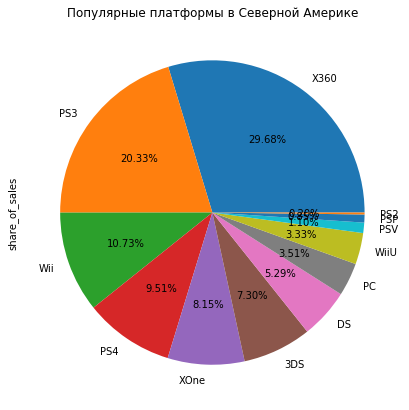

In [70]:
na_platform.plot(kind='pie', y='share_of_sales', autopct='%1.2f%%', figsize=(7,7), legend=None,
                 title='Популярные платформы в Северной Америке')

Самые популярные игровые платформы в Северной Америке - это платформы производства Сони и Майкрософт. Они занимают четыре топовые позиции из пяти. Лидеры по популярности - платформы X360 и PS3. На них приходится 30% и 20% продаж соответственно. Им на смену идут их более современные версии: XOne (8% продаж) и PS4 (9% продаж). Игровая платформа Wii производства Нинтендо занимает третье место по популярности среди жителей Северной Америки (11% продаж)

Определим для пользователей Северной Америки самые популярные жанры и их доли продаж

In [71]:
na_genre = game.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_genre['share_of_sales'] = na_genre['na_sales'] / na_genre['na_sales'].sum() * 100
na_genre.head()

,na_sales,share_of_sales
genre,,
Action,295.43,25.847346
Shooter,238.67,20.881380
Sports,157.82,13.807766
Misc,126.91,11.103431
Role-Playing,112.41,9.834818


Самые любимые жанры у игроманов Северной Америки - жанры Action и Shooter. На них приходится почти половина продаваемых игр (47% продаж). Тройка остальных популярных жанров Sports, Misc и RPG занимает 35% продаж   

Посмотрим, как влияет рейтинг ESRB на продажи в Северной Америке

In [72]:
na_rating = game.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_rating['share_of_sales'] = na_rating['na_sales'] / na_rating['na_sales'].sum() * 100
na_rating

,na_sales,share_of_sales
rating,,
M,385.06,39.027802
E,272.91,27.660825
T,165.84,16.808733
E10+,161.69,16.388109
EC,1.13,0.114531
RP,0.00,0.000000


Северо-американские игроки - это взрослые люди и подростки, предпочитающие игры для взрослых. 40% жителей Северной Америки предпочитают играть в игры с рейтингом М 'Mature' - для лиц, старше 17 лет. Еще 28% пользователей любят игры с рейтингом Е 'Everyone' - для всех. Игры с ограниченной возрастной категорией Т 'Teen' (13-19 лет) и Е10+ 'Everyone 10 and older' (от 10 лет) не очень популярны, а на игры для малышей EC 'Early childhood' спрос практически отсутствует    

Определим для пользователей Европы самые популярные платформы и их доли продаж

In [73]:
eu_platform = game.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_platform['share_of_sales'] = eu_platform['eu_sales'] / eu_platform['eu_sales'].sum() * 100
eu_platform.head()

,eu_sales,share_of_sales
platform,,
PS3,216.06,25.461959
X360,165.26,19.475346
PS4,141.09,16.626992
PC,70.78,8.341190
Wii,66.35,7.819129


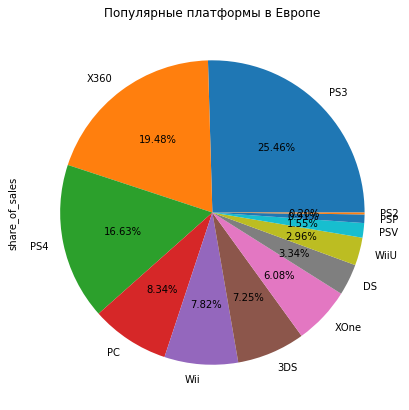

In [74]:
eu_platform.plot(kind='pie', y='share_of_sales', autopct='%1.2f%%', figsize=(7,7), legend=None,
                 title='Популярные платформы в Европе')

В Европе отдают предпочтение японским игровым платформам. Три платформы из пяти - японские. Платформа Сони PS3 лидирует (25% продаж), ей на смену идет обновленная версия - PS4 (17% продаж). Из пяти топовых платформ только одна - производства Майкрософт X360. Но зато на втором месте по популярности и 20% продаж. Жители Европы часто пользуются играми, которые выходят только на ПК (8% продаж) 

Определим для пользователей Европы самые популярные жанры и их доли продаж

In [75]:
eu_genre = game.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_genre['share_of_sales'] = eu_genre['eu_sales'] / eu_genre['eu_sales'].sum() * 100
eu_genre.head()

,eu_sales,share_of_sales
genre,,
Action,237.39,27.975629
Shooter,172.59,20.339163
Sports,117.26,13.818705
Role-Playing,75.65,8.915103
Misc,66.93,7.887480


Предпочтения в игровых жанрах у европейцев полностью совпадают с предпочтениями американцев и канадцев. Самые любимые жанры у игроков Европы, как и у игроков Северной Америки - жанры Action и Shooter. На них приходится почти половина продаваемых игр (47% продаж). Тройка остальных популярных жанров Sports, Misc и RPG занимает 31% продаж

Посмотрим, как влияет рейтинг ESRB на продажи в Европе

In [76]:
eu_rating = game.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_rating['share_of_sales'] = eu_rating['eu_sales'] / eu_rating['eu_sales'].sum() * 100
eu_rating

,eu_sales,share_of_sales
rating,,
M,294.83,41.594481
E,197.64,27.882960
T,115.11,16.239666
E10+,101.17,14.273017
RP,0.07,0.009876
EC,0.00,0.000000


Европейцы, как и жители Северной Америки, продолжают играть в компьютерные игры во взрослом возрасте. Предпочтения на стороне игр с рейтингом М 'Mature' (42% продаж). Также, как и в Америке, 28% жителей Европы любят игры с рейтингом Е 'Everyone'. Игры с ограниченной возрастной категорией Т 'Teen' и Е10+ 'Everyone 10 and older' не очень популярны, а на игры для малышей EC 'Early childhood' спрос полностью отсутствует

Определим для пользователей Японии самые популярные платформы и их доли продаж

In [77]:
jp_platform = game.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_platform['share_of_sales'] = jp_platform['jp_sales'] / jp_platform['jp_sales'].sum() * 100
jp_platform.head()

,jp_sales,share_of_sales
platform,,
3DS,100.65,32.853506
PS3,60.03,19.594595
PSP,42.44,13.852983
DS,27.90,9.106933
PSV,21.91,7.151717


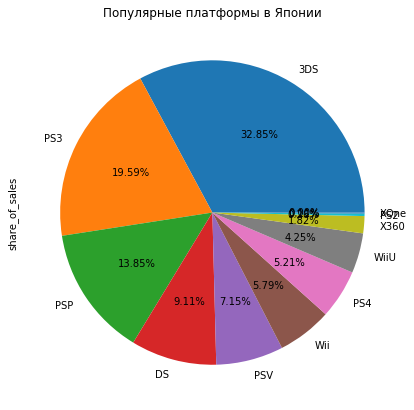

In [78]:
jp_platform.plot(kind='pie', y='share_of_sales', autopct='%1.2f%%', figsize=(7,7), legend=None,
                 title='Популярные платформы в Японии')

Японские игроки могут позволить себе поддерживать отечественного производителя без вреда для качества игры. Все топовые по популярности платформы произведены в Японии. 42% продаж приходится на платформы Нинтендо, 41% продаж приходится на платформы Сони

Определим для пользователей Японии самые популярные жанры и их доли продаж

In [79]:
jp_genre = game.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_genre['share_of_sales'] = jp_genre['jp_sales'] / jp_genre['jp_sales'].sum() * 100
jp_genre.head()

,jp_sales,share_of_sales
genre,,
Role-Playing,103.70,33.849066
Action,72.84,23.775950
Misc,24.54,8.010184
Platform,15.81,5.160595
Adventure,15.69,5.121426


Предпочтения в игровых жанрах у японцев сильно отличаются от вкусов европейцев и северо-американцев. С большим отрывом лидируют жанры RPG (34% продаж) и Action (24% продаж). В топ прибыльных жанров вошли так же Misc, Platform (аналог Action) и Adventure. На их тройку приходится 18% продаж

Посмотрим, как влияет рейтинг ESRB на продажи в Японии

In [80]:
jp_rating = game.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_rating['share_of_sales'] = jp_rating['jp_sales'] / jp_rating['jp_sales'].sum() * 100
jp_rating

,jp_sales,share_of_sales
rating,,
E,47.87,35.604314
T,42.26,31.431759
M,31.10,23.131276
E10+,13.22,9.832652
EC,0.00,0.000000
RP,0.00,0.000000


В Японии в компьютерные игры начинают играть раньше, чем в Европе и Северной Америке. Игры с рейтингом Т 'Teen' занимают второе место по популярности (31% продаж). Еще одна отличительная черта - лидерство продаж игр с рейтингом Е 'Everyone', где содержится минимальное насилие, в основном «мультяшного» характера (36% продаж). Третье место по популярности занимают игры с рейтингом М 'Mature', 23% продаж. Игры с рейтингом Е10+ 'Everyone 10 and older' не очень популярны, а на игры для малышей EC 'Early childhood' спрос полностью отсутствует

### Вывод    

Самые популярные игровые платформы в Северной Америке - это японские платформы производства Сони и платформы отечественного производителя Майкрософт. Они занимают четыре топовые позиции из пяти. Лидеры по популярности - американская платформа X360 и японская PS3. На них приходится 30% и 20% продаж соответственно. Им на смену идут их более современные версии: XOne и PS4. Игровая платформа Wii японского производителя Нинтендо занимает третье место по популярности среди жителей Северной Америки.      
Самые любимые жанры у игроков Северной Америки - жанры Action и Shooter. На них приходится почти половина продаваемых игр (47% продаж). Тройка остальных популярных жанров Sports, Misc и RPG занимает 35% продаж.      
Северо-американские игроки - это взрослые люди и подростки, предпочитающие игры для взрослых. 40% жителей Северной Америки предпочитают играть в игры с рейтингом М 'Mature'. Еще 28% пользователей любят игры с рейтингом Е 'Everyone'. Подростки играют в игры гораздо меньше, чем их родители: игры с ограниченной возрастной категорией Т 'Teen' и Е10+ 'Everyone 10 and older' занимают по 16% продаж, а на игры для малышей EC 'Early childhood' спрос практически отсутствует.   

В Европе отдают бОльшее предпочтение японским игровым платформам. Три платформы из пяти - японские. Платформа Сони PS3 лидирует (25% продаж), ей на смену идет обновленная версия - PS4. Из пяти топовых платформ только одна - американского производства Майкрософт X360. Но зато на втором месте по популярности и 20% продаж. Жители Европы часто пользуются играми, которые выходят только на ПК.      
Предпочтения в игровых жанрах у европейцев полностью совпадают с предпочтениями американцев и канадцев. Самые любимые жанры у игроков Европы, как и у игроков Северной Америки - жанры Action и Shooter. На них приходится почти половина продаваемых игр (47% продаж). Тройка остальных популярных жанров Sports, Misc и RPG занимает 31% продаж.      
Европейцы, как и жители Северной Америки, продолжают играть в компьютерные игры во взрослом возрасте. Предпочтения на стороне игр с рейтингом М 'Mature' (42% продаж). Также, как и в Америке, 28% жителей Европы любят игры с рейтингом Е 'Everyone'. Игры с ограниченной возрастной категорией Т 'Teen' и Е10+ 'Everyone 10 and older' менее популярны, а на игры для малышей EC 'Early childhood' спрос полностью отсутствует.   

Японские игроки могут позволить себе поддерживать отечественного производителя без вреда для качества игры. Все топовые по популярности платформы произведены в Японии. 42% продаж приходится на платформы Нинтендо, 41% продаж приходится на платформы Сони.      
Предпочтения в игровых жанрах у японцев сильно отличаются от вкусов европейцев и северо-американцев. С большим отрывом лидируют жанры RPG (34% продаж) и Action (24% продаж). В топ прибыльных жанров вошли так же Misc, Platform (аналог Action) и Adventure. На их тройку приходится 18% продаж.      
В Японии в компьютерные игры начинают играть раньше, чем в Европе и Северной Америке. Игры с рейтингом Т 'Teen' занимают второе место по популярности (31% продаж). Еще одна отличительная черта - лидерство продаж игр с рейтингом Е 'Everyone', где содержится минимальное насилие, в основном «мультяшного» характера (36% продаж). Третье место по популярности занимают игры с рейтингом М 'Mature'. Игры с рейтингом Е10+ 'Everyone 10 and older' не очень популярны, а на игры для малышей EC 'Early childhood' спрос полностью отсутствует.

### 5. Проверим гипотезы <a name="abcde"></a>

#### Проверим гипотезу, что средние пользовательские рейтинги платформ XOne и PC одинаковые

In [81]:
game.query('platform == "XOne" or platform == "PC"').groupby('platform')['user_score'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PC,387.0,6.525065,1.560695,1.4,5.6,6.8,7.8,9.3
XOne,182.0,6.521429,1.380941,1.6,5.8,6.8,7.5,9.2


Исходя из показателей медианы, среднего и стандартного отклонения пользовательских рейтингов платформ PC и XOne можно предположить, что средний пользовательский рейтинг платформы PC 6.525 не отличается от среднего пользовательского рейтинга платформы XOne 6.521. Проверим это методами статистического анализа

Чтобы проверить гипотезу о равенстве средней оценки пользователей двух генеральных совокупностей - пользователей платформы PC и платформы XOne, применим метод **scipy.stats.ttest_ind()**. Данный метод применяется к двум независимым совокупностям, а пользователи платформы PC и платформы XOne составляют независимые совокупности, так как это разные люди, поведение которых не зависит друг от друга.

Сформулируем нулевую гипотезу: Средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC.    
Тогда альтернативная гипотеза будет звучать так: Средние пользовательские рейтинги платформ XOne и PC различаются.

Зададим критический уровень статистической значимости alpha равным 5% и проверим нулевую гипотезу

In [82]:
alpha = .05
results = st.ttest_ind(game.query('platform == "XOne" and user_score != "NaN"')['user_score'], game.query('platform == "PC" and user_score != "NaN"')['user_score'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.978574281643833
Не получилось отвергнуть нулевую гипотезу


Как видно, р-значение более 97%, что значительно больше уровня статистической значимости.      
Значит, мы не отвергаем нулевую гипотезу о том, что ***Средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC***.   
Поэтому мы отвергаем альтернативную гипотезу: Средние пользовательские рейтинги платформ XOne и PC различаются.

#### Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные

In [83]:
game.query('genre == "Action" or genre == "Sports"').groupby('genre')['user_score'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,797.0,6.789084,1.356880,1.6,6.0,7.1,7.8,9.1
Sports,318.0,5.908805,1.680014,0.2,5.0,6.2,7.2,9.0


Исходя из показателей медианы, среднего и стандартного отклонения пользовательских рейтингов жанров Action и Sports можно предположить, что средний пользовательский рейтинг жанра Action 6.789 отличается от среднего пользовательского рейтинга жанра Sports 5.908. Проверим это методами статистического анализа

Чтобы проверить гипотезу о равенстве средней оценки пользователей двух генеральных совокупностей - пользователей жанра Action и пользователей жанра Sports, применим метод **scipy.stats.ttest_ind()**. Данный метод применяется к двум независимым совокупностям, а пользователи жанра Action и пользователи жанра Sports составляют независимые совокупности, так как это разные люди, поведение которых не зависит друг от друга.

Сформулируем нулевую гипотезу: Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.   
Тогда альтернативная гипотеза будет звучать так: Средние пользовательские рейтинги жанров Action и Sports различаются.

Зададим критический уровень статистической значимости alpha равным 5% и проверим нулевую гипотезу

In [84]:
alpha = .05
results = st.ttest_ind(game.query('genre == "Action" and user_score != "NaN"')['user_score'], game.query('genre == "Sports" and user_score != "NaN"')['user_score'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.613066353206457e-19
Отвергаем нулевую гипотезу


Как видно, р-значение значительно меньше 5%, оно очень близко к нулю.   
Поэтому мы отвергаем выдвинутую нами нулевую гипотезу о том, что Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.    
Значит, мы не отвергаем альтернативную гипотезу: ***Средние пользовательские рейтинги жанров Action и Sports различаются***.

### 6. Общий вывод <a name="abcdef"></a>

Перед нами стояла задача выявить закономерности, определяющие успешность компьютерных игр на конец 2016 года. Это позволит сделать ставку продавцу компьютерных игр на потенциально популярный продукт и спланировать рекламную кампанию на 2017 год. В нашем распоряжении были исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, рейтинги ESRB, жанры и игровые платформы.    

Для анализа наиболее популярных игр, жанров, платформ и поиска закономерностей в их популярности, нами была проведена предобработка данных:   

Названия столбцов приведены к единому регистру.   
Избавились от пропусков в столбцах `name` и `genre`.   
Избавились от пропусков в столбце `year_of_release`. Вначале заменили пропуски в дате выпуска игры на известную нам дату выпуска этой игры по другим записям. Оставшиеся пропуски заменили медианой даты выпуска игр на соответствующей платформе.   
Столбец `year_of_release` приведен к целочисленному типу данных.   
В результате анализа пришли к выводу, что нулевые значения в столбцах по продажам игр в разных регионах: `na_sales`, `eu_sales`, `jp_sales` и `other_sales` являются реальными данными и никаких преобразований не требуют.    
Проанализировали обнаруженные пропуски в столбцах с оценкой игр критиками, пользователями и рейтингом ESRB: `critic_score`, `user_score`, `rating`. Более половины данных в этих столбцах являются пропусками - это большой объем информации. Так как показатель оценки/рейтинга является индивидуальной характеристикой игры/платформы, на которой она используется, и не зависит от показателей оценки/рейтинга других игр, пропуски в данных столбцах оставлены без изменений.           
Аббревиатура **'tbd'**, обнаруженная в столбце user_score, означает **'to be determined'** и переводится как 'будет определено'. То есть на момент заполнения данных оценка игры пользователями отсутствовала, и значение 'tbd' было переведено в 'nan'.   
Столбцам `critic_score` и `user_score` был присвоен вещественный тип данных.   
Для каждой игры на отдельной платформе были посчитаны суммарные продажи во всех регионах.      

Начиная с 1994 года наблюдался постоянный рост количества выпускаемых игр. Пик производства пришелся на 2008, 2009 годы, когда стартовали популярные франшизы: 1463 и 1455 игр соответственно. После этого начался обратный процесс: количество выпускаемых компьютерных игр ежегодно уменьшалось. Начиная с 2012 года на рынке появились мобильные приложения игр для смартфонов, и пользователи переключились на них. В 2016 году было произведено уже лишь 502 игры.   

**Трое самых прибыльных производителей игровых приставок**:   

- Сони. Игровые платформы PS,PS2, PS3, PS4, PSP   
- Майкрософт. Игровые платформы Х360, ХВ, XOne   
- Нинтендо. Игровые платформы Wii, DS, 3DS, GBA, GB   

Производители выпускают на рынок очередную игровую платформу каждые 5-6 лет. Срок жизни платформы длится в основном 8-10 лет. Следовательно, для 2017 года будут актуальными игры, выпущенные не ранее 2007 года. Однако для рекламной кампании нужен запас времени, чтобы средства, инвестированные в игру, приносили прибыль в ближайшие 2-3 года. Поэтому были выбраны для анализа более молодые платформы, выпущенные с 2010 года.   

Обнаружена общая тенденция, связанная с появлением на рынке мобильных приложений игр для смартфонов, - падение доходности от выпускаемых игр на всех платформах, начиная с 2012 года. **На конец 2016 года можно выбрать несколько потенциально прибыльных платформ. Это игровые платформы, суммы продаж по которым составили не менее 300 000 долларов в год**:   

- PS4 (доход 0.42 млн долларов за 2016 год), производства Сони   
- 3DS (доход 0.33 млн долларов за 2016 год), производства Нинтендо   
- XOne (доход 0.30 млн долларов за 2016 год), производства Майкрософт   

**Платформа производства Сони PS4 является самой доходной и перспективной в плане рекламных инвестиций в игры на ее основе**.
У PS4 самые большие ежегодные доходам от продаж игр - до 1.75 млн.долл. Половина получаемых доходов тоже составляет самую большую величину: от 0.06 до 0.73 млн.долл. Средний годовой доход равен 0.8 млн.долл, медиана прибыли - 0.2 млн.долл.
**Чуть менее доходной платформой является платформа Майкрософта XOne**. Ежегодные доходы от продаж не намного уступают PS4: до 1.57 млн.долл. Средний доход за год равен 0.65 млн.долл, медиана прибыли - 0.22 млн.долл.
**Платформа Нинтендо 3DS занимает третье место по продажам**. Ежегодные доходы от продаж не превышает 0.75 млн.долл. Средний доход от продажи игры на платформе 3DS составляет 0.5 млн.долл в год, медиана прибыли - 0.12 млн.долл.     

Проанализировали влияние отзывов критиков на продажи внутри одной из популярных платформ Сони PS4.   
Установлено, что чем выше оценка игры критиками, тем выше ее продажи. Низкой оценке игры сответствуют невысокие и редкие доходы от ее продаж. С ростом ее оценки критиками увеличивается и доход, и количество продаж игры.
Коэффициент корреляции Пирсона подтверждает наличие прямой зависимости, хоть и не очень сильной, объемов продаж игр на платформе PS4 от их оценки критиками.   
**Вывод: при выборе игры потребители ориентируются на профессиональное мнение критиков**.   
В результате проведенной на платформах 3DS и XOne проверки влияния отзывов критиков на продажи игр, наш вывод подтвердился.     

Проанализировали влияние отзывов пользователей на продажи внутри платформы PS4.
Установлено, что рост оценки игры пользователями не влияет на ее продажи. Высокие доходы от продаж игры встречаются как при высокой ее оценке пользователями, так и при низкой. Можно даже наблюдать обратную зависимость: у игр с меньшей оценкой продажи выше, чем у игр с более высокой оценкой.     
Коэффициент корреляции Пирсона подтверждает отсутствие линейной зависимости объемов продаж игр на платформе PS4 от их оценки пользователями.       
**Вывод: при выборе игры потребители не учитывают мнение других, таких же пользователей, а ориентируются на свои предпочтения**.   
В результате проведенной на платформах 3DS и XOne проверки влияния отзывов пользователей на продажи игр, наш вывод подтвердился.   
 

**Проанализировали распределение игр по жанрам. Самые прибыльные жанры**:   

- Action (683.43 млн.долл)   
- Shooter (482.47 млн.долл)   
- Sports (330.00 млн.долл)   
- Role-Playing (316.05 млн.долл)     

**Лидеры по продажам - игры GTA (20% продаж) и Call of Duty (57% продаж)**. Популярность игры достигается за счет ежегодного выпуска производителем франшиз. Седьмое место занимает игра шведского программиста Minecraft.   
Самыми популярными жанрами являются жанры, в которых используются франшизы. Например, для жанров Shooter и Sports есть устоявшиеся франшизы, такие как Call of duty для первой и FIFA для второй. Эти игры выходят каждый год.   
Крупные игры, наподобие FIFA или Assassin's Creed, являюся мультиплатформенными компьютерными играми, т.е. выпускаются на всех платформах. А игры жанра Strategy, вроде Warcraft Total War, которые крайне успешны для стратегий, выходят только на ПК, так как неудобно на геймпаде играть в стратегии. А на комьютере не очень удобно, соответственно, играть в гонки, игры жанра Simulation.   
**Основные критерии прибыльности игры - это известность франшизы и мультиплатформенность**.     

**Самые популярные игровые платформы в Северной Америке - это японские платформы производства Сони и платформы отечественного производителя Майкрософт**. Они занимают четыре топовые позиции из пяти. Лидеры по популярности - американская платформа X360 и японская PS3. На них приходится 30% и 20% продаж соответственно. Им на смену идут их более современные версии: XOne и PS4. Игровая платформа Wii японского производителя Нинтендо занимает третье место по популярности среди жителей Северной Америки.   
**Самые любимые жанры у игроков Северной Америки - жанры Action и Shooter**. На них приходится почти половина продаваемых игр (47% продаж). Тройка остальных популярных жанров Sports, Misc и RPG занимает 35% продаж.   
**Северо-американские игроки - это взрослые люди**. 40% жителей Северной Америки предпочитают играть в игры с рейтингом М 'Mature'. Еще 28% пользователей любят игры с рейтингом Е 'Everyone'. Подростки играют в игры гораздо меньше, чем их родители: игры с ограниченной возрастной категорией Т 'Teen' и Е10+ 'Everyone 10 and older' занимают по 16% продаж, а на игры для малышей EC 'Early childhood' спрос практически отсутствует.   

**В Европе отдают бОльшее предпочтение японским игровым платформам**. Три платформы из пяти - японские. Платформа Сони PS3 лидирует (25% продаж), ей на смену идет обновленная версия - PS4. Из пяти топовых платформ только одна - американского производства Майкрософт X360. Но зато платформа Майкрософт X360 занимает второе место по популярности и 20% продаж. Жители Европы часто пользуются играми, которые выходят только на ПК.   
Предпочтения в игровых жанрах у европейцев полностью совпадают с предпочтениями американцев и канадцев. **Самые любимые жанры у игроков Европы, как и у игроков Северной Америки - жанры Action и Shooter**. На них приходится почти половина продаваемых игр (47% продаж). Тройка остальных популярных жанров Sports, Misc и RPG занимает 31% продаж.
**Европейцы, как и жители Северной Америки, продолжают играть в компьютерные игры во взрослом возрасте**. Предпочтения на стороне игр с рейтингом М 'Mature' (42% продаж). Также, как и в Америке, 28% жителей Европы любят игры с рейтингом Е 'Everyone'. Игры с ограниченной возрастной категорией Т 'Teen' и Е10+ 'Everyone 10 and older' менее популярны, а на игры для малышей EC 'Early childhood' спрос полностью отсутствует.   

Японские игроки могут позволить себе поддерживать отечественного производителя без вреда для качества игры. **Все топовые по популярности платформы в Японии произведены тоже в Японии**. Лидирует платформа 3DS (33% продаж), второе место по прибыльности занимает PS3 (20% продаж). Всего на платформы Нинтендо приходится 42% продаж, на платформы Сони - 41% продаж.      
**Предпочтения в игровых жанрах у японцев отличаются от вкусов европейцев и северо-американцев. С большим отрывом лидируют жанры RPG и Action**. На них приходится почти 60% продаж. В топ прибыльных жанров вошли так же Misc, Platform (аналог Action) и Adventure. На их тройку приходится 18% продаж.   
**В Японии играть в компьютерные игры подростки любят не меньше взрослых**. Игры с рейтингом Т 'Teen' занимают второе место по популярности (31% продаж). Еще одна отличительная черта - лидерство продаж игр с рейтингом Е 'Everyone', где содержится минимальное насилие, в основном «мультяшного» характера (36% продаж). Третье место по популярности занимают игры с рейтингом М 'Mature'. Игры с рейтингом Е10+ 'Everyone 10 and older' не очень популярны, а на игры для малышей EC 'Early childhood' спрос полностью отсутствует.      

Для проведения сравнительного анализа основной метрики - среднего пользовательского рейтинга различных игровых платформ и жанров были сформулированы и проанализированы две гипотезы:   

1. Средние пользовательские рейтинги платформ XOne и PC одинаковые      
2. Средние пользовательские рейтинги жанров Action и Sports разные   

В результате проведенного статистического анализа наши гипотезы подтвердились:      

**1. Средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC**.   
**2. Средние пользовательские рейтинги жанров Action и Sports различаются**.      

Таким образом, при проведении рекламной кампании на 2017 год интернет-магазину "Стримчик" следует рассматривать платформы двух поколений от лидеров игрового производства: 
- Сони. Игровые платформы PS3 и PS4      
- Майкрософт. Игровые платформы Х360 и XOne      
- Нинтендо. Игровые платформы Wii и 3DS      

При выборе платформ следует ориентироваться на профессиональную оценку критиков, а не на пользовательские рейтинги.   
Наиболее перспективные игры с жанрами Action, Shooter, Role-Playing и Sports. Игры следует выбирать, ориентируясь на известность франшизы и их мультиплатформенность. У рекламируемых игр должен быть рейтинг ESRB М 'Mature', Е 'Everyone' или Т 'Teen'.